In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tsf-datasets/student_scores.csv
/kaggle/input/tsf-datasets/matches.csv
/kaggle/input/tsf-datasets/deliveries.csv
/kaggle/input/tsf-datasets/globalterrorismdb_0718dist.csv
/kaggle/input/tsf-datasets/india-news-headlines.csv
/kaggle/input/tsf-datasets/SampleSuperstore.csv
/kaggle/input/tsf-datasets/Iris.csv


In [2]:
## import data

data = pd.read_csv ('../input/tsf-datasets/student_scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# describe data

data.shape
data.describe().round()

,Hours,Scores
count,25.0,25.0
mean,5.0,51.0
std,3.0,25.0
min,1.0,17.0
25%,3.0,30.0
50%,5.0,47.0
75%,7.0,75.0
max,9.0,95.0


In [4]:
#cols.
data.columns
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# more information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# search for dublicated
data.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

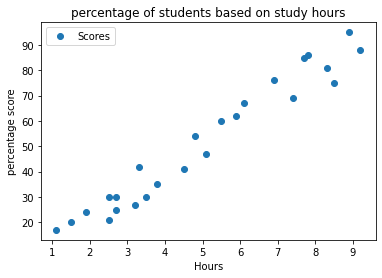

In [7]:
# plotting data

#x = data['Hours']
#y = ['Scores']
#x, y : array_like, shape (n, )
#plt.scatter(x=x,y=y)
data.plot(x='Hours' , y ='Scores', style='o')
plt.xlabel('Hours')
plt.ylabel('percentage score')
plt.title('percentage of students based on study hours')
plt.show

In [8]:
#preparing data & training

x = data.iloc[: , :-1].values
y = data.iloc[: , 1].values

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 ,random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

print("complete training")

complete training


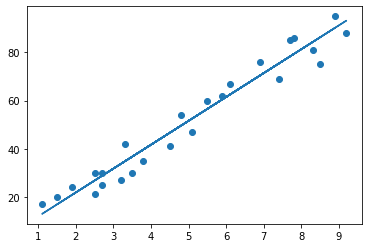

In [9]:
#regression line

line = regressor.coef_*x+regressor.intercept_

plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [10]:
#predictions (testing data)

print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
#comparing

df = pd.DataFrame({'Actual': y_test , 'Predicted' : y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
#test with hours = 9.25

#hours = 9.25
#hours_pred = regressor.predict(hours)

#print("No. of hours= {} ".format(hours))
#print("prediction = {}".format(hours_pred[0]))

In [13]:
#test with hours = 9.25

hours = [[9.25]]
test_pred= regressor.predict(hours)
print("No. of hours= {} ".format(hours))
print("prediction = {}".format(test_pred[0]))


No. of hours= [[9.25]] 
prediction = 93.69173248737539


In [14]:
print('mean error:'), metrics.mean_absolute_error(y_test,pred)

mean error:


NameError: name 'metrics' is not defined